# Scoring Visualizations

*Will Greenwood*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')#dark mode
import matplotlib.cm as cm
import seaborn as sns
import numpy as np

In [2]:
bart_br = pd.read_csv("../../Scores/Bart_sum_scores.csv")
bart_frp = pd.read_csv("../../Scores/Bart_temp_BERT_score.csv")

gemini_br = pd.read_csv("../../Scores/gemini_sum_scores.csv")
gemini_frp = pd.read_csv("../../Scores/Gemini_temp_BERT_score.csv")

pegasus_br = pd.read_csv("../../Scores/Pegasus_sum_scores.csv")
pegasus_frp = pd.read_csv("../../Scores/Pegasus_temp_BERT_score.csv")

t5_br = pd.read_csv("../../Scores/T5_sum_scores.csv")
t5_frp = pd.read_csv("../../Scores/T5_temp_Bert_score.csv")

/var/folders/8s/87fx2s5d6fsdx0q2xj19_xw40000gn/T/ipykernel_26731/1022384458.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(color_map)


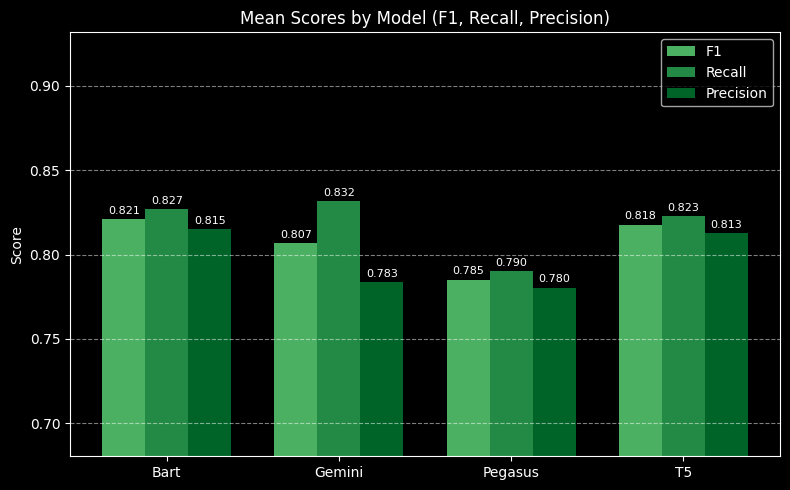

/var/folders/8s/87fx2s5d6fsdx0q2xj19_xw40000gn/T/ipykernel_26731/1022384458.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(color_map)


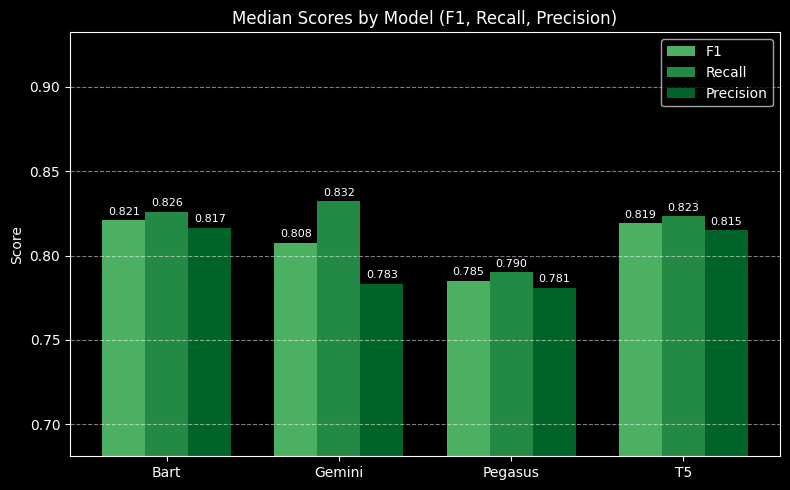

In [33]:
metrics = ['F1', 'Recall', 'Precision']
models = ['Bart', 'Gemini', 'Pegasus', 'T5']

means = {}
medians = {}

# Collect means and medians
for model in models:
    model_df = eval(f"{model.lower()}_frp")
    means[model] = [model_df['F1'].mean(), model_df['R'].mean(), model_df['P'].mean()]
    medians[model] = [model_df['F1'].median(), model_df['R'].median(), model_df['P'].median()]


x = np.arange(len(models))
width = 1 / len(models)

def plot_grouped_metrics(data_dict, title, color_map='Greens'):
    x = np.arange(len(models))
    width = 0.25

    fig, ax = plt.subplots(figsize=(8, 5))

    # Get colors from the colormap
    cmap = cm.get_cmap(color_map)
    # colors = [cmap(0.3), cmap(0.6), cmap(0.9)]
    colors = [cmap(0.6), cmap(0.75), cmap(0.9)]

    all_scores = []
    for i, metric in enumerate(metrics):
        metric_values = [data_dict[model][i] for model in models]
        all_scores.extend(metric_values)

        bars = ax.bar(x + i*width - width, metric_values, width, label=metric, color=colors[i],alpha=1.0)

        # Score lables
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.002,
                    f'{height:.3f}', ha='center', va='bottom', fontsize=8)

    y_min = min(all_scores) - 0.1
    y_max = max(all_scores) + 0.1
    ax.set_ylim(y_min, y_max)

    ax.set_ylabel('Score')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(models)
    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Plot means and medians
plot_grouped_metrics(means, "Mean Scores by Model (F1, Recall, Precision)", color_map='Greens')
plot_grouped_metrics(medians, "Median Scores by Model (F1, Recall, Precision)", color_map='Greens')


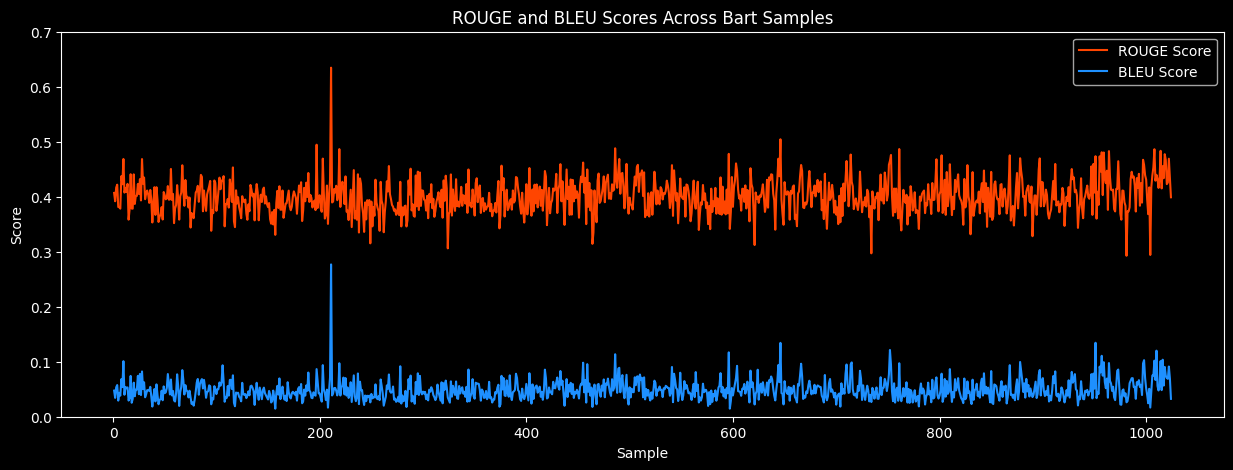

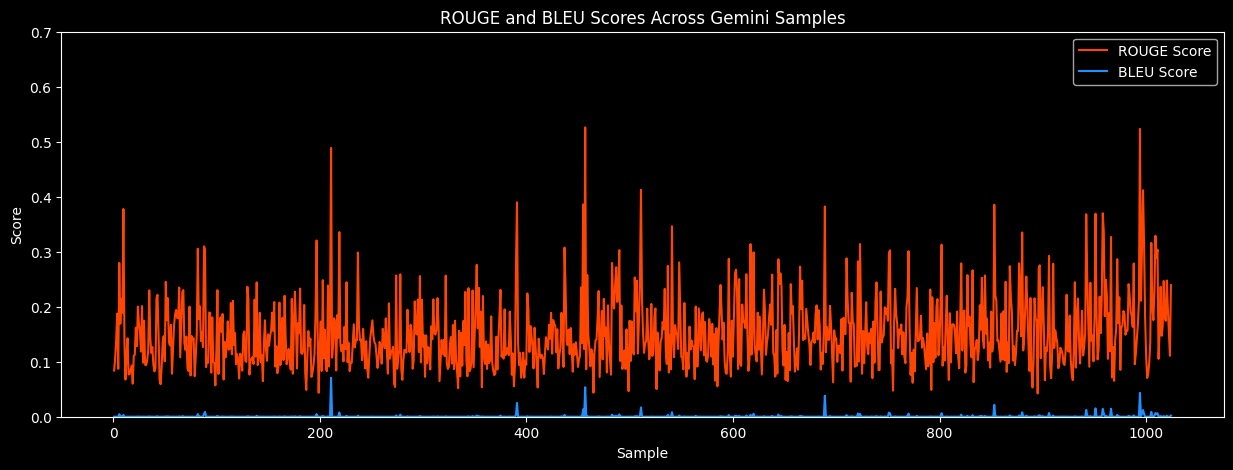

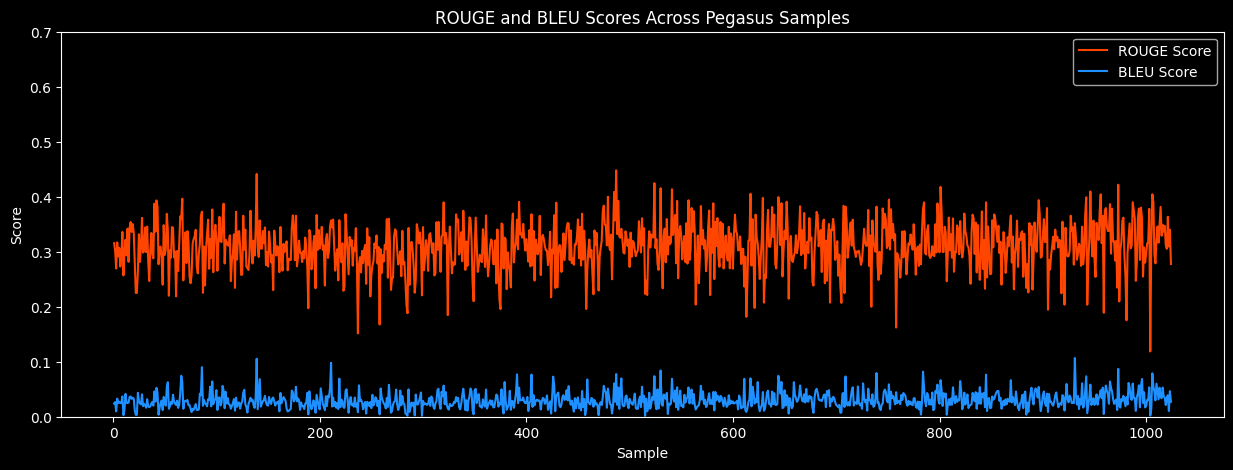

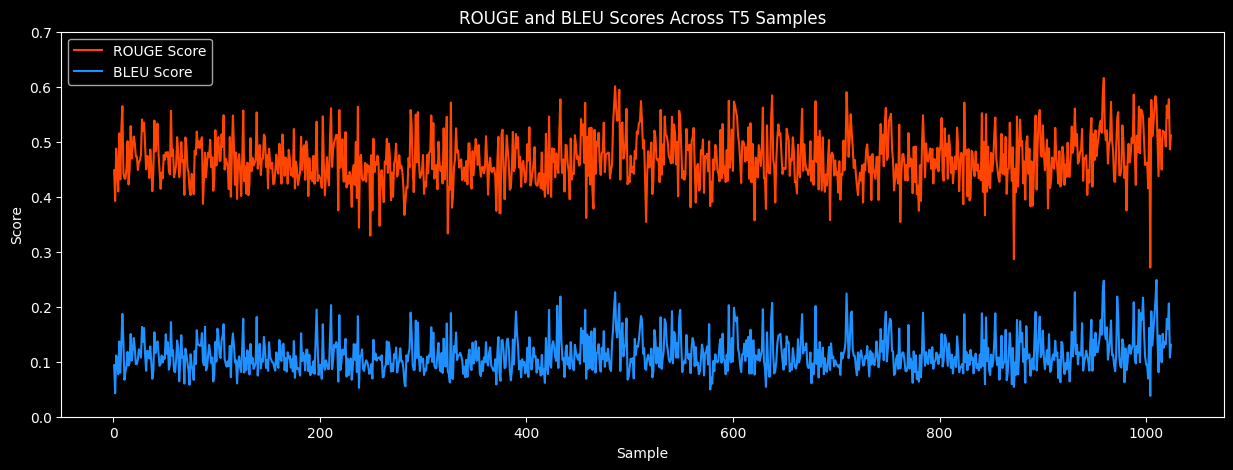

In [34]:
sample_range = list(range(1, len(bart_br) + 1))

def plot_samples(model):
    model_df = eval(f"{model.lower()}_br")
    plt.figure(figsize=(15, 5))
    plt.plot(sample_range, model_df['Rouge Score'], label='ROUGE Score', color='orangered',alpha=1.0)
    plt.plot(sample_range, model_df['Bleu Score'], label='BLEU Score', color='dodgerblue',alpha=1.0)
    plt.ylim(0, 0.7)
    plt.xlabel("Sample")
    plt.ylabel("Score")
    plt.legend()
    plt.title(f"ROUGE and BLEU Scores Across {model} Samples")

for model in models:
    plot_samples(model)

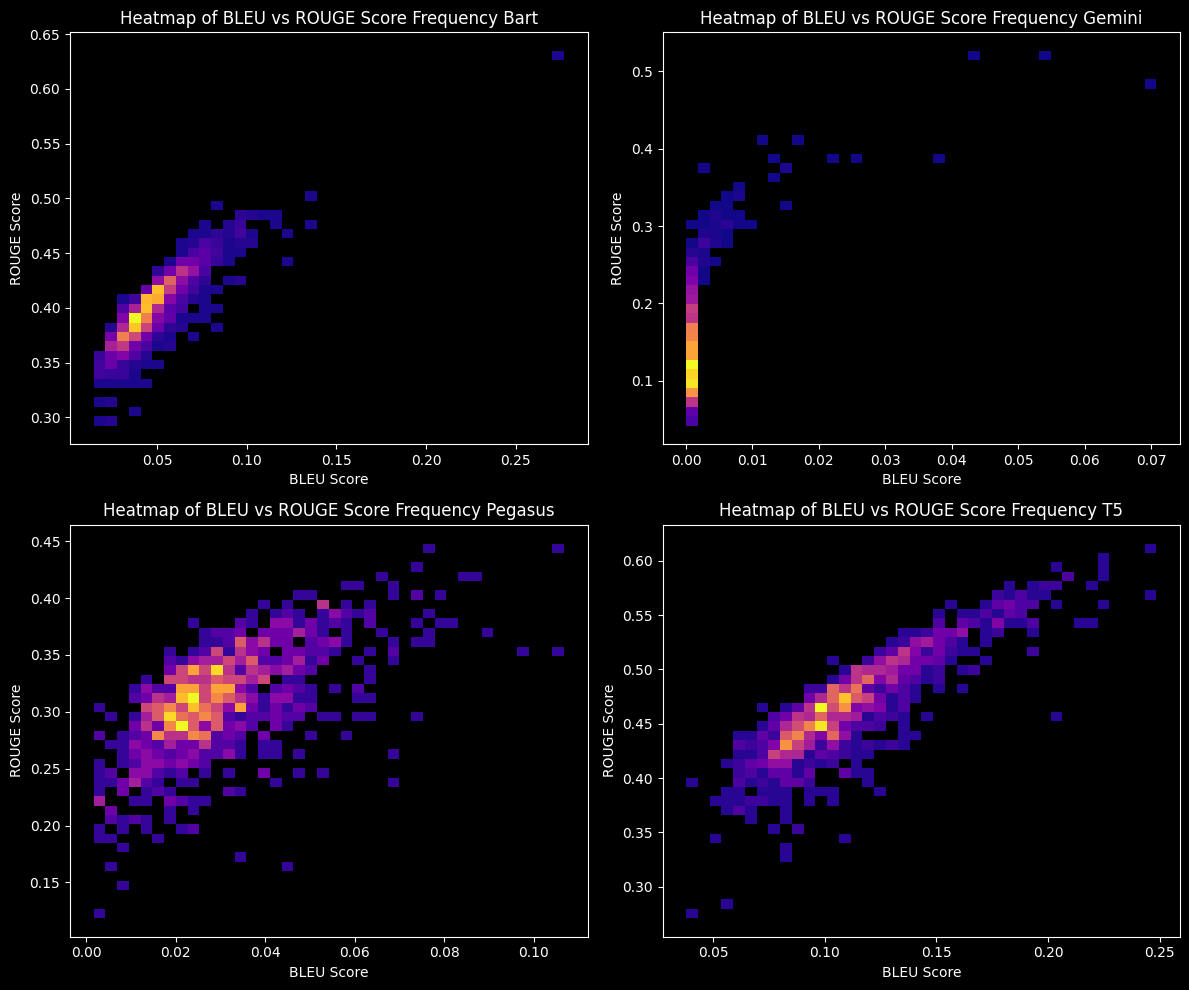

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for ax, model in zip(axes, models):
    sns.histplot(
        data=eval(f"{model.lower()}_br"),
        x="Bleu Score",
        y="Rouge Score",
        bins=40,
        cmap="plasma",
        # cmap="cool",
        ax=ax
    )
    ax.set_title(f"Heatmap of BLEU vs ROUGE Score Frequency {model}")
    ax.set_xlabel("BLEU Score")
    ax.set_ylabel("ROUGE Score")

plt.tight_layout()
plt.show()